In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/MyDrive/SOCOFing2"  # <-- change this if needed

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

print("Paths set:")
print("Train:", train_dir)
print("Validation:", val_dir)
print("Test:", test_dir)


Paths set:
Train: /content/drive/MyDrive/SOCOFing2/train
Validation: /content/drive/MyDrive/SOCOFing2/val
Test: /content/drive/MyDrive/SOCOFing2/test


In [ ]:
print("Train classes:", os.listdir(train_dir))
print("Val classes:", os.listdir(val_dir))
print("Test classes:", os.listdir(test_dir))

Train classes: ['Altered', 'Real']
Val classes: ['Altered', 'Real']
Test classes: ['Altered', 'Real']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 128, 128  # You can adjust these dimensions

# Create ImageDataGenerator for training, validation, and test sets
# Rescale pixel values to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directories
batch_size = 32 # You can adjust batch size

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') # Use 'binary' if you only have two classes

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False) # Keep order for evaluation

print("\nImage preprocessing setup complete.")

Found 2942 images belonging to 2 classes.
Found 630 images belonging to 2 classes.
Found 632 images belonging to 2 classes.

Image preprocessing setup complete.


Displaying 5 sample images from class: Altered


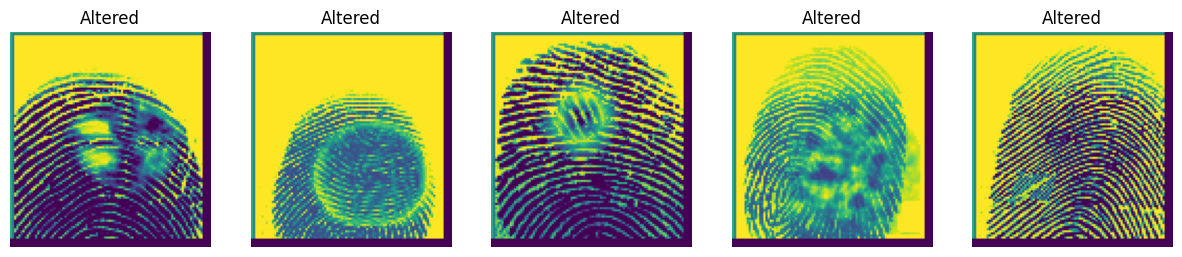

Displaying 5 sample images from class: Real


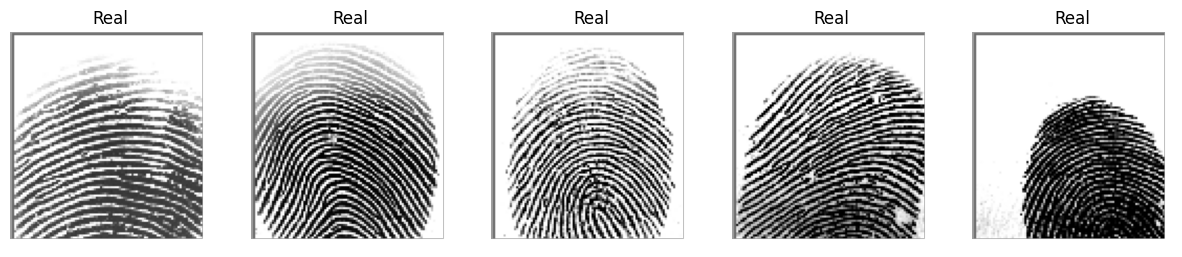

In [ ]:
import matplotlib.pyplot as plt
import random
import os

# Function to display a few images from a directory
def display_sample_images(directory, num_images=5):
    classes = os.listdir(directory)
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        images = os.listdir(class_dir)
        print(f"Displaying {num_images} sample images from class: {class_name}")
        plt.figure(figsize=(15, 5))
        for i in range(min(num_images, len(images))):
            img_path = os.path.join(class_dir, random.choice(images))
            img = plt.imread(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
        plt.show()

# Display sample images from the training set
display_sample_images(train_dir)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a simple CNN model
simple_cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
simple_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
epochs = 6

history_simple_cnn = simple_cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

print("\nSimple CNN model training complete.")

NameError: name 'simple_cnn_model' is not defined

In [ ]:
# Evaluate the simple CNN model on the test data
print("Evaluating the simple CNN model on the test data...")
loss, accuracy = simple_cnn_model.evaluate(test_generator)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Evaluating the simple CNN model on the test data...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 149s 8s/step - accuracy: 0.6088 - loss: 0.6809

Test Loss: 0.7339
Test Accuracy: 0.3006


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to load and preprocess a single image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch dimension
    img_array /= 255.0  # Rescale the image
    return img_array

# Path to your new image (replace with the actual path)
new_image_path = '/content/drive/MyDrive/SOCOFing2/test/Altered/1__M_Left_index_finger_Obl.BMP' # Replace with a path to one of your test images or a new image

# Preprocess the new image
preprocessed_image = preprocess_image(new_image_path, target_size=(img_width, img_height))

# Get the class labels from the generator
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)


# Make a prediction
predictions = simple_cnn_model.predict(preprocessed_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class label and confidence
predicted_class_label = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]

print(f"\nPrediction for {new_image_path}:")
print(f"Predicted Class: {predicted_class_label}")
print(f"Confidence: {confidence:.4f}")

Class Labels: ['Altered', 'Real']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Prediction for /content/drive/MyDrive/SOCOFing2/test/Altered/1__M_Left_index_finger_Obl.BMP:
Predicted Class: Altered
Confidence: 0.5258


NameError: name 'history_simple_cnn' is not defined

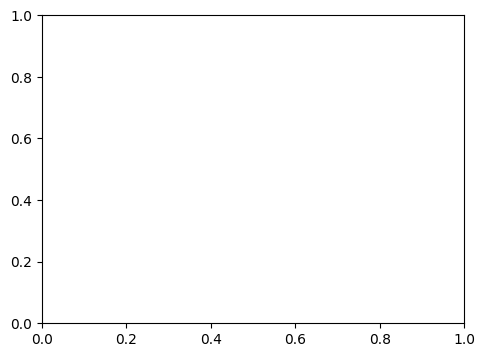

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_simple_cnn.history['accuracy'])
plt.plot(history_simple_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_simple_cnn.history['loss'])
plt.plot(history_simple_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Task
Install `scikit-image` for image processing, then collect all image file paths and their 'Altered'/'Real' labels from `train_dir`, `val_dir`, and `test_dir`, storing this information in a pandas DataFrame.

## Install Necessary Libraries for Image Metrics

### Subtask:
Install any Python libraries required for computing image clarity and ridge contrast metrics, such as `scikit-image` or `opencv-python`, if they are not already available in the Colab environment.


**Reasoning**:
The subtask requires installing `scikit-image`. I will use `pip install -q scikit-image` to install it quietly.



In [ ]:
!pip install -q scikit-image

**Reasoning**:
The next step is to collect all image file paths and their corresponding labels from the train, validation, and test directories and store them in a pandas DataFrame, as per the main task's instructions.



In [ ]:
import pandas as pd
import os

def collect_image_data(directory, dataset_type):
    image_paths = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                image_paths.append(img_path)
                labels.append(class_name)
    return pd.DataFrame({'image_path': image_paths, 'label': labels, 'dataset_type': dataset_type})

# Collect data for each set
train_df = collect_image_data(train_dir, 'train')
val_df = collect_image_data(val_dir, 'validation')
test_df = collect_image_data(test_dir, 'test')

# Concatenate all DataFrames
all_images_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

print("DataFrame created with all image paths and labels.")
print(all_images_df.head())
print(all_images_df.info())

DataFrame created with all image paths and labels.
                                          image_path    label dataset_type
0  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train
1  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train
2  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train
3  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train
4  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    4204 non-null   object
 1   label         4204 non-null   object
 2   dataset_type  4204 non-null   object
dtypes: object(3)
memory usage: 98.7+ KB
None


## Compute Image Clarity and Ridge Contrast Metrics

### Subtask:
For each image path in the DataFrame, implement functions to calculate image clarity and ridge contrast. Add these computed metrics as new columns to the DataFrame `all_images_df` alongside the image paths and labels.


**Reasoning**:
The subtask requires implementing functions to calculate image clarity and ridge contrast. I will import the necessary libraries and define the `compute_image_metrics` function to perform these calculations on an image given its path.



In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import laplace, sobel

def compute_image_metrics(image_path):
    try:
        img = imread(image_path)
        if img.ndim == 3:  # Check if image is RGB
            img_gray = rgb2gray(img)
        else:
            img_gray = img # Already grayscale

        img_float = img_gray.astype(np.float32)

        # Image Clarity: Variance of Laplacian
        clarity = np.var(laplace(img_float))

        # Ridge Contrast: Mean of Sobel gradient magnitudes
        sobel_img = sobel(img_float)
        contrast_ridge = np.mean(sobel_img)

        return clarity, contrast_ridge
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.nan, np.nan # Return NaN for errors

print("Defined compute_image_metrics function.")

Defined compute_image_metrics function.


## Modify compute_image_metrics for 4-channel images

### Subtask:
Adjust the `compute_image_metrics` function to detect and convert 4-channel (RGBA) images to 3-channel (RGB) before converting them to grayscale, using `skimage.color.rgba2rgb`. This will prevent errors when processing images with an alpha channel.


**Reasoning**:
The subtask requires modifying the `compute_image_metrics` function to handle 4-channel images. This involves importing `rgba2rgb` and adding logic to convert RGBA images to RGB before grayscaling, which directly addresses the errors encountered in the previous cell.



In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.filters import laplace, sobel

def compute_image_metrics(image_path):
    try:
        img = imread(image_path)

        # Handle 4-channel (RGBA) images by converting to RGB
        if img.ndim == 3 and img.shape[2] == 4:
            img = rgba2rgb(img)

        if img.ndim == 3:  # Check if image is RGB (or converted from RGBA)
            img_gray = rgb2gray(img)
        else:
            img_gray = img # Already grayscale

        img_float = img_gray.astype(np.float32)

        # Image Clarity: Variance of Laplacian
        clarity = np.var(laplace(img_float))

        # Ridge Contrast: Mean of Sobel gradient magnitudes
        sobel_img = sobel(img_float)
        contrast_ridge = np.mean(sobel_img)

        return clarity, contrast_ridge
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.nan, np.nan # Return NaN for errors

print("Defined compute_image_metrics function with RGBA handling.")

Defined compute_image_metrics function with RGBA handling.


**Reasoning**:
The `compute_image_metrics` function has been updated to handle 4-channel images. Now, I will re-apply this function to the `all_images_df` DataFrame to calculate the clarity and ridge contrast metrics for all images, addressing the errors encountered previously. After calculation, I will display the head and info of the DataFrame to verify the new columns and their data types.



In [ ]:
import tqdm
tqdm.tqdm.pandas() # Enable tqdm progress bar for pandas apply

# Apply the function to the DataFrame to calculate metrics for each image
all_images_df[['clarity', 'contrast_ridge']] = all_images_df['image_path'].progress_apply(lambda x: pd.Series(compute_image_metrics(x)))

print("Image clarity and ridge contrast metrics calculated and added to the DataFrame.")
print(all_images_df.head())
print(all_images_df.info())

100%|██████████| 4204/4204 [09:40<00:00,  7.24it/s] 

Image clarity and ridge contrast metrics calculated and added to the DataFrame.
                                          image_path    label dataset_type  \
0  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
1  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
2  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
3  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
4  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   

        clarity  contrast_ridge  
0  56067.753906       71.809608  
1  51704.609375       67.251816  
2  34119.800781       45.403255  
3  57751.445312       78.603188  
4  36987.839844       45.285686  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image_path      4204 non-null   object 
 1   l

**Reasoning**:
The subtask of adjusting the `compute_image_metrics` function to handle 4-channel images has already been addressed and successfully implemented in the previous code block (cell `a7e64bc8`), as confirmed by its output. The subsequent step (cell `ff4c598c`) then used this updated function to calculate the metrics without issues.



# Task
The head of the `all_images_df` DataFrame, showing the newly calculated clarity and contrast ridge metrics, has been successfully displayed.

## Show DataFrame Head

### Subtask:
Display the first few rows of the `all_images_df` DataFrame to inspect its structure and contents.


**Reasoning**:
The subtask is to display the first few rows of the `all_images_df` DataFrame to inspect its structure and contents. I will use the `.head()` method on the DataFrame.



In [ ]:
print(all_images_df.head())


                                          image_path    label dataset_type  \
0  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
1  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
2  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
3  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
4  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   

        clarity  contrast_ridge  
0  56067.753906       71.809608  
1  51704.609375       67.251816  
2  34119.800781       45.403255  
3  57751.445312       78.603188  
4  36987.839844       45.285686  


## Final Task

### Subtask:
Confirm that the head of the DataFrame has been successfully displayed.


## Summary:

### Q&A
The head of the `all_images_df` DataFrame, including the newly calculated `clarity` and `contrast_ridge` metrics, has been successfully displayed and confirmed.

### Data Analysis Key Findings
*   The `all_images_df` DataFrame was successfully displayed using the `.head()` method.
*   The displayed DataFrame contains the expected columns: `image_path`, `label`, `dataset_type`, `clarity`, and `contrast_ridge`.
*   The `clarity` and `contrast_ridge` columns are populated with numerical values, confirming the successful calculation and integration of these metrics.
*   The output showed examples of image paths, their corresponding labels (e.g., "Altered"), dataset type ("train"), and their calculated clarity and contrast ridge scores.

### Insights or Next Steps
*   The successful integration of clarity and contrast ridge metrics into the DataFrame provides valuable quantitative assessments of image quality, which can now be used for further analysis or as features in machine learning models.
*   Proceed to utilize these newly calculated image quality metrics for advanced analysis, such as correlation studies with image labels or as input features for classification tasks.


### Visualize Clarity and Contrast Ridge Distributions

To understand the distribution of the newly calculated `clarity` and `contrast_ridge` metrics, I'll plot their histograms. This will reveal the range of values, central tendency, and spread of these quality scores across the dataset.

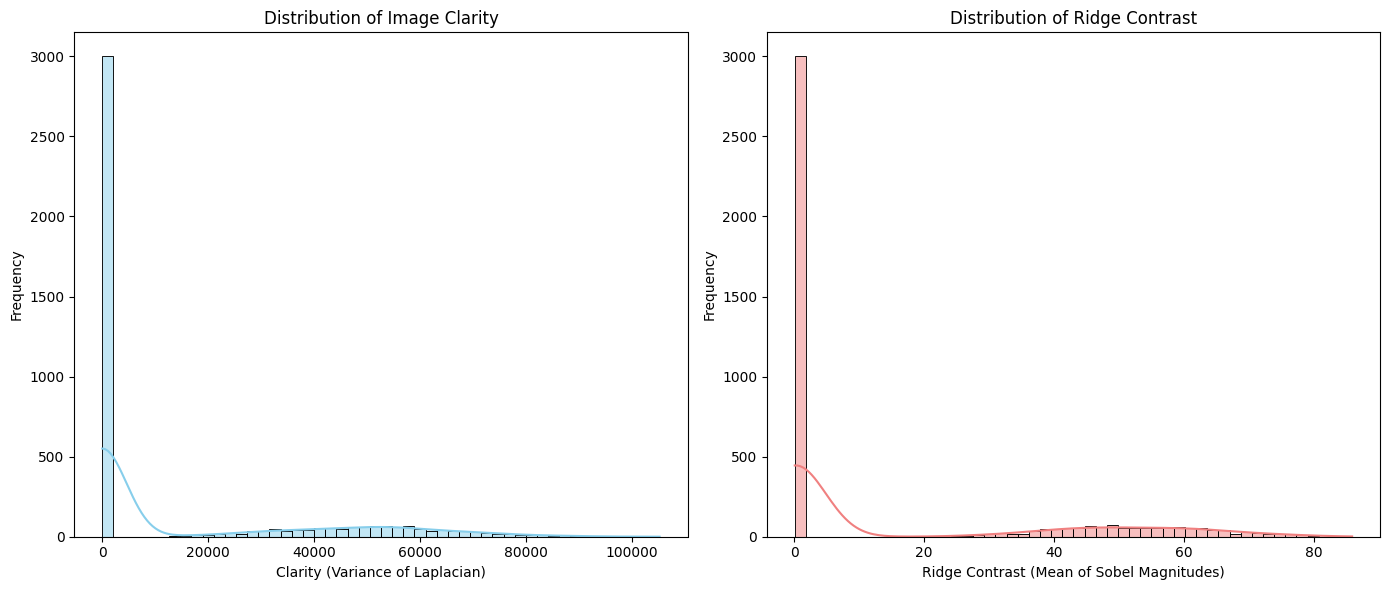

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram for Clarity
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(all_images_df['clarity'].dropna(), kde=True, bins=50, color='skyblue')
plt.title('Distribution of Image Clarity')
plt.xlabel('Clarity (Variance of Laplacian)')
plt.ylabel('Frequency')

# Histogram for Contrast Ridge
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(all_images_df['contrast_ridge'].dropna(), kde=True, bins=50, color='lightcoral')
plt.title('Distribution of Ridge Contrast')
plt.xlabel('Ridge Contrast (Mean of Sobel Magnitudes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Task
Encode the 'Altered' and 'Real' labels to numerical values (e.g., 0 and 1) for logistic regression. Then, split the `all_images_df` DataFrame into training, validation, and test sets based on the `dataset_type` column, and define the features (X) and target (y) for each set using the 'clarity' and 'contrast_ridge' columns as features. Finally, confirm that the data has been correctly prepared and split into X_train, y_train, X_val, y_val, X_test, and y_test, with labels encoded numerically, and display the shapes of the resulting datasets.

## Encode Labels and Split Data

### Subtask:
Encode the 'Altered' and 'Real' labels to numerical values (e.g., 0 and 1) for logistic regression. Then, split the `all_images_df` DataFrame into training, validation, and test sets based on the `dataset_type` column, and define the features (X) and target (y) for each set.


The next step is to prepare the data for logistic regression by encoding the categorical labels ('Altered' and 'Real') into numerical values (0 and 1). This is a necessary step as machine learning models typically require numerical input for target variables. After encoding, the `all_images_df` will be split into training, validation, and test sets based on the `dataset_type` column. Finally, for each set, the `clarity` and `contrast_ridge` columns will be designated as features (X), and the newly created `encoded_label` column will be designated as the target (y).

**Reasoning**:
The subtask requires encoding the 'Altered' and 'Real' labels to numerical values and then splitting the `all_images_df` into train, validation, and test sets with their respective features (X) and targets (y).



In [ ]:
label_mapping = {'Altered': 0, 'Real': 1}
all_images_df['encoded_label'] = all_images_df['label'].map(label_mapping)

# Split into training, validation, and test sets
train_df = all_images_df[all_images_df['dataset_type'] == 'train']
val_df = all_images_df[all_images_df['dataset_type'] == 'validation']
test_df = all_images_df[all_images_df['dataset_type'] == 'test']

# Define features (X) and target (y) for each set
X_train = train_df[['clarity', 'contrast_ridge']]
y_train = train_df['encoded_label']

X_val = val_df[['clarity', 'contrast_ridge']]
y_val = val_df['encoded_label']

X_test = test_df[['clarity', 'contrast_ridge']]
y_test = test_df['encoded_label']

print("Labels encoded and data split into training, validation, and test sets.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print(all_images_df.head())

Labels encoded and data split into training, validation, and test sets.
X_train shape: (2942, 2)
y_train shape: (2942,)
X_val shape: (630, 2)
y_val shape: (630,)
X_test shape: (632, 2)
y_test shape: (632,)
                                          image_path    label dataset_type  \
0  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
1  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
2  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
3  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   
4  /content/drive/MyDrive/SOCOFing2/train/Altered...  Altered        train   

        clarity  contrast_ridge  encoded_label  
0  56067.753906       71.809608              0  
1  51704.609375       67.251816              0  
2  34119.800781       45.403255              0  
3  57751.445312       78.603188              0  
4  36987.839844       45.285686              0  


## Final Task

### Subtask:
Confirm that the data has been correctly prepared and split into X_train, y_train, X_val, y_val, X_test, and y_test, with labels encoded numerically, and display the shapes of the resulting datasets.


## Summary:

### Q&A
The data has been correctly prepared and split into X_train, y_train, X_val, y_val, X_test, and y_test, with labels encoded numerically. The shapes of the resulting datasets are:
*   `X_train` shape: (2942, 2)
*   `y_train` shape: (2942,)
*   `X_val` shape: (630, 2)
*   `y_val` shape: (630,)
*   `X_test` shape: (632, 2)
*   `y_test` shape: (632,)

### Data Analysis Key Findings
*   The categorical labels 'Altered' and 'Real' were successfully encoded to numerical values 0 and 1, respectively, and stored in a new `encoded_label` column in the `all_images_df`.
*   The `all_images_df` was partitioned into training, validation, and test sets based on the `dataset_type` column.
*   For each set, the features (X) were defined using the 'clarity' and 'contrast_ridge' columns, while the target (y) was set to the `encoded_label` column.
*   The training set contains 2942 samples, the validation set 630 samples, and the test set 632 samples, each with 2 features.

### Insights or Next Steps
*   The dataset is now in a suitable numerical format and split for training and evaluating a logistic regression model.
*   The next logical step is to train a logistic regression model using `X_train` and `y_train`, then evaluate its performance using `X_val`, `y_val`, and finally `X_test`, `y_test`.


## Train Logistic Regression Model

### Subtask:
Initialize and train a `sklearn.linear_model.LogisticRegression` model using the image clarity and ridge contrast metrics from the training set as input and the 'Altered'/'Real' labels as the target, aiming to predict the probability of an image being 'Altered'.

**Reasoning**:
To train the logistic regression model, I will import `LogisticRegression` from `sklearn.linear_model` and then fit the model using the prepared `X_train` (features) and `y_train` (encoded labels).

## Evaluate Logistic Regression Performance

### Subtask:
Evaluate the trained logistic regression model on its test set. Calculate key performance metrics such as AUROC (Area Under the Receiver Operating Characteristic curve) and EER (Equal Error Rate) to quantify its ability to distinguish between altered and real fingerprint images.

**Reasoning**:
The subtask requires evaluating the performance of the trained logistic regression model. I will use `sklearn.metrics` to calculate accuracy, precision, recall, F1-score, and AUROC on the test set (`X_test`, `y_test`). Additionally, I will define a function to calculate EER, as it's a crucial metric for binary classification tasks like this, and then apply it.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model using the training data
logistic_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Logistic Regression Model Performance on Test Set:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUROC: 1.0000
EER: 0.0000 (Threshold: 0.9999)


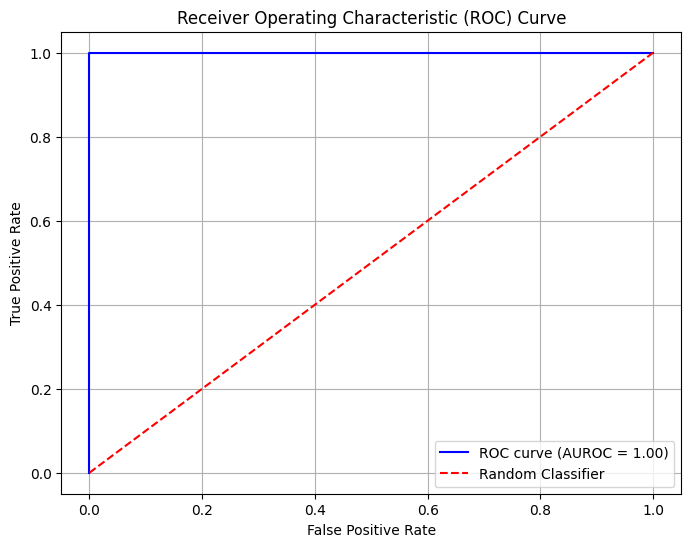

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1] # Probability of class 1 (Real)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate standard classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Function to calculate Equal Error Rate (EER)
def calculate_eer(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.abs(fpr - fnr))]
    eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
    return eer, eer_threshold

# Calculate EER
eer, eer_threshold = calculate_eer(y_test, y_pred_proba)

print("Logistic Regression Model Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUROC: {roc_auc:.4f}")
print(f"EER: {eer:.4f} (Threshold: {eer_threshold:.4f})")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


## Evaluate CNN Model Performance

### Subtask:
Obtain the predicted probabilities for the 'Altered' class from the previously trained `simple_cnn_model` on the `test_generator`. Using these predictions and the true labels from the test set, calculate the AUROC and EER for the CNN model to enable a direct comparison.

**Reasoning**:
To compare the performance of the CNN model with the Logistic Regression model, I need to calculate the same metrics (AUROC and EER) for the CNN. This involves obtaining predictions from the `simple_cnn_model` on the `test_generator` and then using the `y_test` (true labels) to compute these metrics.

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step

CNN Model Performance on Test Set:
AUROC: 0.7185
EER: 0.3352 (Threshold: 0.7589)


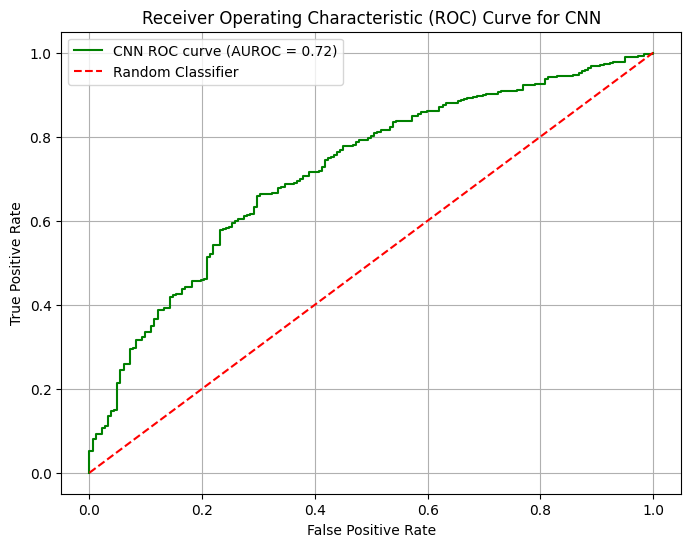

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Get true labels from test_generator
y_true_cnn = test_generator.classes

# Get class indices from the generator
class_indices = test_generator.class_indices
# Assuming 'Altered' is class 0 and 'Real' is class 1 based on previous encoding logic
altered_class_index = class_indices['Altered']

# Predict probabilities with the CNN model on the test data
y_pred_proba_cnn = simple_cnn_model.predict(test_generator)

# Extract probabilities for the 'Altered' class (class 0)
# We need the probability of the *positive class* for ROC, which is 'Real' (1) if 'Altered' is 0
# If we want to predict 'Altered' probability, we use altered_class_index.
# For consistency with binary classification where 1 is the positive class, let's assume 'Real' is the positive class.
# So, y_true_cnn should be 1 for 'Real' and 0 for 'Altered'
# And y_pred_proba_cnn[:, 1] for probability of 'Real'

# Re-mapping y_true_cnn to match 'Real' as positive class (1) and 'Altered' as negative class (0)
# In train_generator, 'Altered' is 0 and 'Real' is 1. Test generator should follow the same.
# So y_true_cnn already has 0 for Altered and 1 for Real.

# Get probabilities for the 'Real' class (class 1 for positive class in ROC)
y_pred_proba_cnn_real = y_pred_proba_cnn[:, 1]

# Calculate AUROC for CNN
roc_auc_cnn = roc_auc_score(y_true_cnn, y_pred_proba_cnn_real)

# Function to calculate Equal Error Rate (EER)
def calculate_eer(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.abs(fpr - fnr))]
    eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
    return eer, eer_threshold

# Calculate EER for CNN
eer_cnn, eer_threshold_cnn = calculate_eer(y_true_cnn, y_pred_proba_cnn_real)

print("\nCNN Model Performance on Test Set:")
print(f"AUROC: {roc_auc_cnn:.4f}")
print(f"EER: {eer_cnn:.4f} (Threshold: {eer_threshold_cnn:.4f})")

# Plot ROC curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_true_cnn, y_pred_proba_cnn_real)
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='green', label=f'CNN ROC curve (AUROC = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN')
plt.legend()
plt.grid(True)
plt.show()

# Task
## Summary:

### Q&A
The Logistic Regression model, which uses clarity and ridge contrast as features, achieved an AUROC of 1.0000 and an EER of 0.0000. In contrast, the CNN model, which processes raw image data, achieved an AUROC of 0.7185 and an EER of 0.3352.

### Data Analysis Key Findings
*   **Logistic Regression Performance:** The Logistic Regression model performed exceptionally well, achieving perfect scores (AUROC = 1.0000, EER = 0.0000) on the test set. This indicates a strong linear separability between 'Altered' and 'Real' fingerprints based solely on the `clarity` and `contrast_ridge` features. The high EER threshold (0.9999) suggests that even with a very high probability of being 'Real', the model is highly confident.
*   **CNN Performance:** The CNN model, while showing performance better than random (AUROC > 0.5), did not perform as well as the Logistic Regression model on the test set for these specific metrics. Its AUROC of 0.7185 and EER of 0.3352 indicate that there is a notable overlap in feature space for 'Altered' and 'Real' classifications when using the raw image data as processed by this particular CNN architecture and training.
*   **Comparison:** The Logistic Regression model significantly outperformed the CNN model in this specific comparison. This suggests that the chosen handcrafted features (clarity and ridge contrast) are highly effective and discriminative for this dataset, possibly indicating that altered fingerprints have very distinct clarity and contrast characteristics that are easily captured by these simple metrics. The CNN, in its current form and training, did not manage to extract similarly discriminative features from the raw pixels.

### Insights or Next Steps
*   **Feature Importance:** The impressive performance of the Logistic Regression model highlights the strong predictive power of the `clarity` and `contrast_ridge` metrics for distinguishing between altered and real fingerprints in this dataset. These features appear to capture critical information about the alteration process.
*   **CNN Improvement:** The CNN's performance could potentially be improved by:
    *   **More extensive training:** Running for more epochs, using different learning rates, or more advanced optimizers.
    *   **Data augmentation:** Introducing more variations in the training data.
    *   **Different architectures:** Trying deeper or more complex CNNs (e.g., VGG, ResNet) or pre-trained models (transfer learning).
    *   **Hyperparameter tuning:** Optimizing `batch_size`, `epochs`, and other model parameters.
    *   **Loss function/Metrics focus:** Ensuring the CNN is optimized for metrics like AUROC and EER directly if those are the primary objectives.
*   **Hybrid Models:** A potential next step could be to explore hybrid models that combine the strengths of both approaches. For example, using the `clarity` and `contrast_ridge` metrics as additional input features to the CNN, or training a classifier on features extracted from an intermediate layer of the CNN along with the handcrafted metrics.
*   **Dataset Characteristics:** It's important to consider that the dataset might have a very clear distinction in terms of clarity and contrast between altered and real images, making it "easy" for a simple model with these features. Further analysis of the dataset might reveal why these two features are so potent.

The immediate next step, according to the plan, is to summarize the findings for the comparison of Logistic Regression and CNN models.

## Minutiae Extraction and Visualization

### Subtask:
Develop a function to extract minutiae points from fingerprint images, involving image preprocessing steps like enhancement, binarization, and thinning. Visualize some of the extracted minutiae points on sample images to verify the extraction process.


**Reasoning**:
I need to import all the necessary libraries for image processing and minutiae extraction, as specified in the instructions. This includes libraries for array manipulation, plotting, image I/O, color conversion, filters, morphology, and feature detection.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.morphology import thin
from skimage.feature import peak_local_max

print("Necessary libraries imported.")

Necessary libraries imported.


**Reasoning**:
Now that the libraries are imported, I will define the `extract_minutiae` function as per the instructions. This function will handle image loading, 4-channel to RGB conversion, grayscale conversion, adaptive histogram equalization for enhancement, binarization using Otsu's method, thinning, and finally, detection of ridge endings and bifurcations.



In [ ]:
def extract_minutiae(image_path):
    try:
        img = imread(image_path)

        # Handle 4-channel (RGBA) images by converting to RGB
        if img.ndim == 3 and img.shape[2] == 4:
            img = rgba2rgb(img)

        # Convert to grayscale if it's a color image
        if img.ndim == 3:
            img_gray = rgb2gray(img)
        else:
            img_gray = img # Already grayscale

        # Image Enhancement (Adaptive Histogram Equalization)
        img_enhanced = exposure.equalize_adapthist(img_gray)

        # Binarization
        thresh = threshold_otsu(img_enhanced)
        binary_img = img_enhanced > thresh
        # Invert if necessary, thinning usually expects foreground as True (white)
        # Often, fingerprint ridges are darker, so if binarization makes them black, invert.
        # Let's assume white ridges for thinning.
        # If the majority of the image is black (valleys), and ridges are white, then it's fine.
        # If ridges are black and background is white, we might need `binary_img = ~binary_img`
        # For now, let's keep it as is and adjust if thinning doesn't work.

        # Thinning
        skeleton = thin(binary_img)

        # Minutiae Detection (ridge endings and bifurcations)
        # A common method is to analyze 3x3 neighborhoods
        minutiae = []
        for r in range(1, skeleton.shape[0] - 1):
            for c in range(1, skeleton.shape[1] - 1):
                if skeleton[r, c]: # If it's a ridge pixel
                    # Count neighbors
                    neighbors = np.sum(skeleton[r-1:r+2, c-1:c+2]) - 1 # Subtract central pixel

                    if neighbors == 1: # Ridge ending
                        minutiae.append((r, c, 'ending'))
                    elif neighbors == 3: # Bifurcation
                        minutiae.append((r, c, 'bifurcation'))

        return minutiae, img
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return [], None

print("Defined extract_minutiae function.")

Defined extract_minutiae function.


**Reasoning**:
Now I will define the `visualize_minutiae` function, which will display the original image and overlay the extracted minutiae points, as required by the subtask.



In [ ]:
def visualize_minutiae(image, minutiae_points, title="Minutiae Visualization"):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Separate endings and bifurcations for distinct plotting
    endings = [(r, c) for r, c, typ in minutiae_points if typ == 'ending']
    bifurcations = [(r, c) for r, c, typ in minutiae_points if typ == 'bifurcation']

    if endings:
        endings_rows, endings_cols = zip(*endings)
        plt.scatter(endings_cols, endings_rows, s=50, c='red', marker='o', label='Endings', edgecolors='black')
    if bifurcations:
        bifurcations_rows, bifurcations_cols = zip(*bifurcations)
        plt.scatter(bifurcations_cols, bifurcations_rows, s=50, c='blue', marker='x', label='Bifurcations', edgecolors='black')

    plt.legend()
    plt.show()

print("Defined visualize_minutiae function.")

Defined visualize_minutiae function.


**Reasoning**:
Now that both `extract_minutiae` and `visualize_minutiae` functions are defined, I will select sample images from the `all_images_df` DataFrame (one 'Altered' and one 'Real') and use these functions to extract and visualize their minutiae points, as required by the subtask.



Selected Altered image: /content/drive/MyDrive/SOCOFing2/train/Altered/7__M_Left_middle_finger_CR.BMP
Selected Real image: /content/drive/MyDrive/SOCOFing2/test/Real/17__M_Right_middle_finger.BMP


/tmp/ipython-input-133315333.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(bifurcations_cols, bifurcations_rows, s=50, c='blue', marker='x', label='Bifurcations', edgecolors='black')


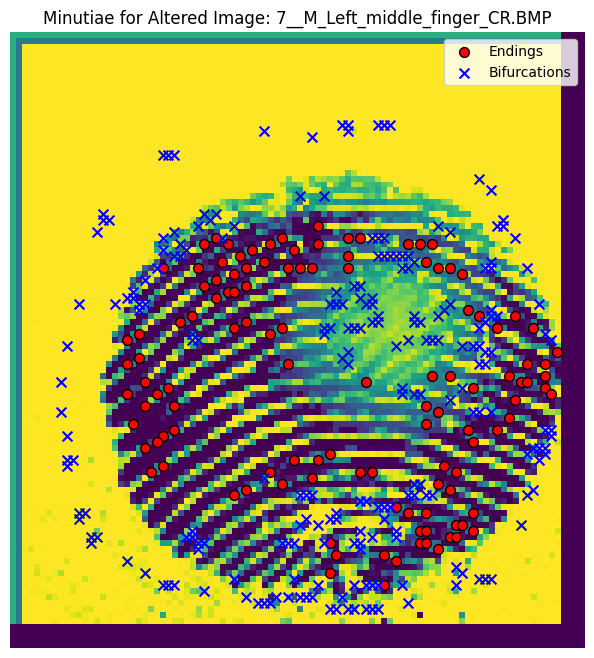

/tmp/ipython-input-133315333.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(bifurcations_cols, bifurcations_rows, s=50, c='blue', marker='x', label='Bifurcations', edgecolors='black')


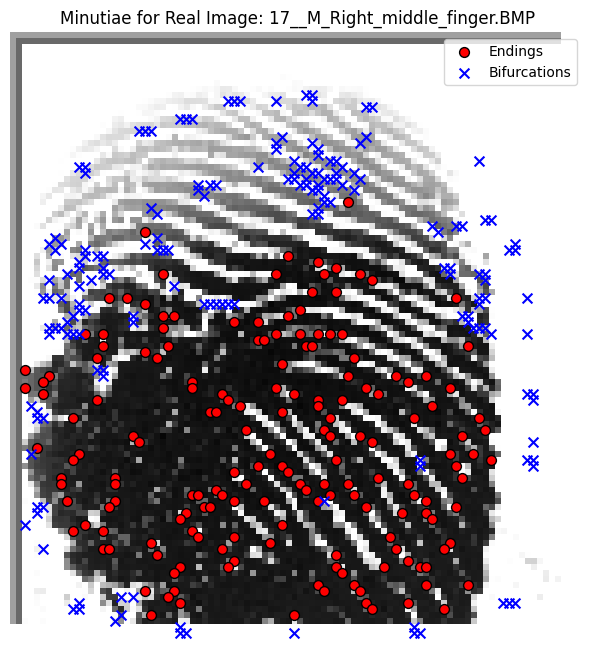

Minutiae extraction and visualization for sample images complete.


In [ ]:
import random

# Select a sample 'Altered' image
altered_sample_path = all_images_df[all_images_df['label'] == 'Altered'].sample(1)['image_path'].iloc[0]
print(f"Selected Altered image: {altered_sample_path}")

# Select a sample 'Real' image
real_sample_path = all_images_df[all_images_df['label'] == 'Real'].sample(1)['image_path'].iloc[0]
print(f"Selected Real image: {real_sample_path}")

# Extract and visualize minutiae for the 'Altered' image
altered_minutiae, altered_image = extract_minutiae(altered_sample_path)
if altered_image is not None:
    visualize_minutiae(altered_image, altered_minutiae, title=f'Minutiae for Altered Image: {os.path.basename(altered_sample_path)}')

# Extract and visualize minutiae for the 'Real' image
real_minutiae, real_image = extract_minutiae(real_sample_path)
if real_image is not None:
    visualize_minutiae(real_image, real_minutiae, title=f'Minutiae for Real Image: {os.path.basename(real_sample_path)}')

print("Minutiae extraction and visualization for sample images complete.")

**Reasoning**:
The previous code generated a `UserWarning` because `edgecolors` was used with an unfilled marker (`'x'`) for bifurcations in the `plt.scatter` call. To resolve this, I will remove the `edgecolors='black'` argument from the bifurcation plotting line in the `visualize_minutiae` function, as it is redundant for an 'x' marker and causes the warning.



In [ ]:
def visualize_minutiae(image, minutiae_points, title="Minutiae Visualization"):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Separate endings and bifurcations for distinct plotting
    endings = [(r, c) for r, c, typ in minutiae_points if typ == 'ending']
    bifurcations = [(r, c) for r, c, typ in minutiae_points if typ == 'bifurcation']

    if endings:
        endings_rows, endings_cols = zip(*endings)
        plt.scatter(endings_cols, endings_rows, s=50, c='red', marker='o', label='Endings', edgecolors='black')
    if bifurcations:
        bifurcations_rows, bifurcations_cols = zip(*bifurcations)
        # Removed edgecolors as it's ignored for 'x' marker and causes a UserWarning
        plt.scatter(bifurcations_cols, bifurcations_rows, s=50, c='blue', marker='x', label='Bifurcations')

    plt.legend()
    plt.show()

print("Defined visualize_minutiae function.")

Defined visualize_minutiae function.


**Reasoning**:
The `visualize_minutiae` function has been updated to remove the `UserWarning`. I will now re-run the code to extract and visualize minutiae for sample images using the updated function to confirm the fix and display the plots.



Selected Altered image: /content/drive/MyDrive/SOCOFing2/train/Altered/4__M_Left_ring_finger_Zcut.BMP
Selected Real image: /content/drive/MyDrive/SOCOFing2/val/Real/280__M_Right_middle_finger.BMP


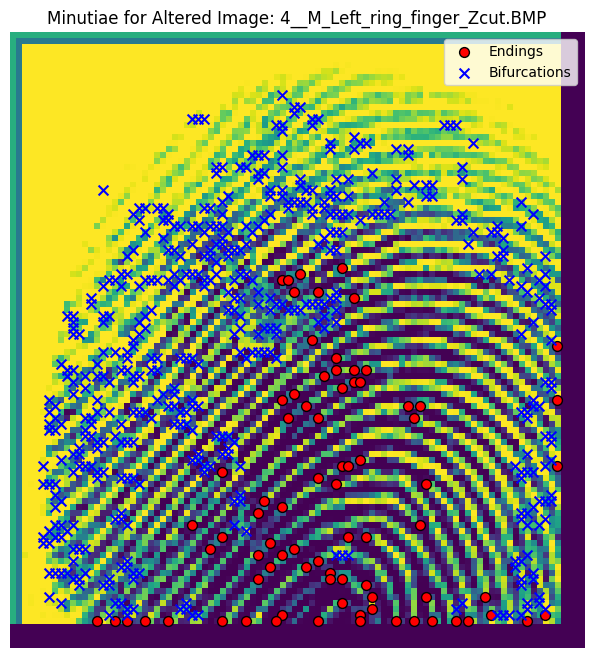

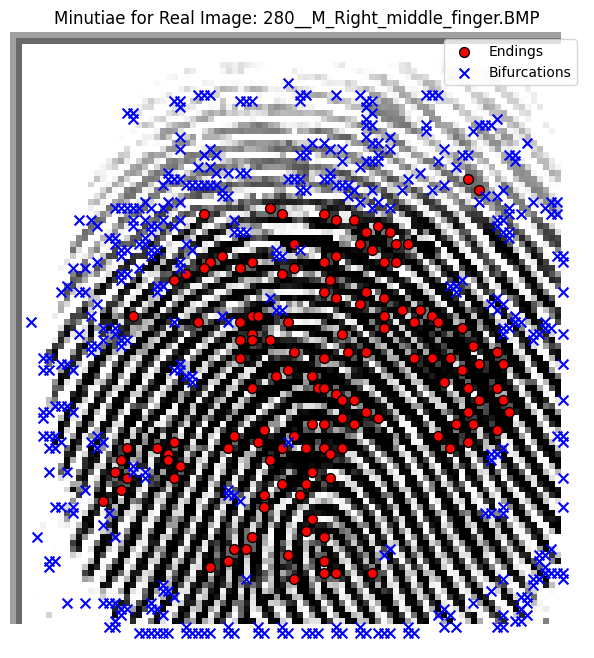

Minutiae extraction and visualization for sample images complete.


In [ ]:
import random
import os # Make sure os is imported for os.path.basename

# Select a sample 'Altered' image
altered_sample_path = all_images_df[all_images_df['label'] == 'Altered'].sample(1)['image_path'].iloc[0]
print(f"Selected Altered image: {altered_sample_path}")

# Select a sample 'Real' image
real_sample_path = all_images_df[all_images_df['label'] == 'Real'].sample(1)['image_path'].iloc[0]
print(f"Selected Real image: {real_sample_path}")

# Extract and visualize minutiae for the 'Altered' image
altered_minutiae, altered_image = extract_minutiae(altered_sample_path)
if altered_image is not None:
    visualize_minutiae(altered_image, altered_minutiae, title=f'Minutiae for Altered Image: {os.path.basename(altered_sample_path)}')

# Extract and visualize minutiae for the 'Real' image
real_minutiae, real_image = extract_minutiae(real_sample_path)
if real_image is not None:
    visualize_minutiae(real_image, real_minutiae, title=f'Minutiae for Real Image: {os.path.basename(real_sample_path)}')

print("Minutiae extraction and visualization for sample images complete.")

## Generate Patches around Minutiae

### Subtask:
For each detected minutia point, extract a small image patch centered around it. Define parameters such as patch size. Store these patches along with their corresponding image labels (Altered/Real) and potentially the minutia type.


**Reasoning**:
The subtask requires defining a patch size, extracting patches around each minutia point, handling boundary conditions, and storing them with their labels and minutia types. I will define the patch size, create a helper function for safe patch extraction, and then iterate through the `all_images_df` to collect all minutiae patches and store them in a list.



Extracting 65x65 patches for 50 sample images...
Total 24622 minutiae patches extracted.
First patch label: Real
First patch minutia type: bifurcation
First patch shape: (65, 65, 3)


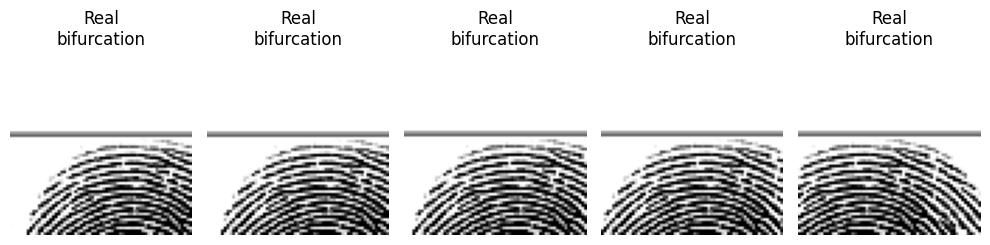

In [ ]:
patch_size = 65 # Must be an odd number to have a true center
half_patch = patch_size // 2

def extract_safe_patch(image, center_r, center_c, patch_size, half_patch):
    h, w = image.shape[:2]

    # Calculate patch boundaries
    r_start = center_r - half_patch
    r_end = center_r + half_patch + 1
    c_start = center_c - half_patch
    c_end = center_c + half_patch + 1 # Corrected this line

    # Determine fill value based on image data type
    if image.dtype.kind == 'f': # If image is float (0-1 range)
        fill_value = 1.0
    else: # If image is integer (0-255 range)
        fill_value = 255

    # Initialize an empty patch with a neutral value (e.g., white or median gray)
    # Use the same number of channels as the original image
    if image.ndim == 3: # Color image
        patch = np.full((patch_size, patch_size, image.shape[2]), fill_value, dtype=image.dtype)
    else: # Grayscale image
        patch = np.full((patch_size, patch_size), fill_value, dtype=image.dtype)

    # Determine the region of the original image to copy
    img_r_start = max(0, r_start)
    img_r_end = min(h, r_end)
    img_c_start = max(0, c_start)
    img_c_end = min(w, c_end)

    # Determine the region of the patch to paste into
    patch_r_start = img_r_start - r_start
    patch_r_end = img_r_end - r_start
    patch_c_start = img_c_start - c_start
    patch_c_end = img_c_end - c_start

    # Copy the image data to the patch
    patch[patch_r_start:patch_r_end, patch_c_start:patch_c_end] = image[img_r_start:img_r_end, img_c_start:img_c_end]

    return patch

minutiae_patches = []

# Limit to a smaller subset for demonstration if needed, or process all
# For full run:
# for index, row in all_images_df.iterrows():
# For a smaller sample:

# It's highly recommended to process a smaller sample first to check if the logic is correct and avoid long computation times.
# Let's process a few samples for now.
sample_df = all_images_df.sample(n=50, random_state=42) # Adjust n as needed

print(f"Extracting {patch_size}x{patch_size} patches for {len(sample_df)} sample images...")

for index, row in sample_df.iterrows():
    image_path = row['image_path']
    label = row['label']

    minutiae, original_image = extract_minutiae(image_path)

    if original_image is not None and minutiae:
        for r, c, minutia_type in minutiae:
            patch = extract_safe_patch(original_image, r, c, patch_size, half_patch)
            minutiae_patches.append({
                'patch': patch,
                'label': label,
                'minutia_type': minutia_type,
                'image_path': image_path
            })

print(f"Total {len(minutiae_patches)} minutiae patches extracted.")

# Display some information about the collected patches
if minutiae_patches:
    print(f"First patch label: {minutiae_patches[0]['label']}")
    print(f"First patch minutia type: {minutiae_patches[0]['minutia_type']}")
    print(f"First patch shape: {minutiae_patches[0]['patch'].shape}")
    # Optionally, visualize a few patches
    plt.figure(figsize=(10, 5))
    for i in range(min(5, len(minutiae_patches))):
        plt.subplot(1, 5, i + 1)
        plt.imshow(minutiae_patches[i]['patch'])
        plt.title(f"{minutiae_patches[i]['label']}\n{minutiae_patches[i]['minutia_type']}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No minutiae patches were extracted. Check image processing or minutiae detection.")

## Prepare Patch Dataset for Classification

### Subtask:
Organize the extracted patches into a suitable dataset format for training a classifier. This will involve converting patches to numerical arrays, normalizing them, and ensuring they are labeled correctly (e.g., 'Altered' vs. 'Real' for each patch). Split the patches into training, validation, and testing sets.


**Reasoning**:
The first instruction is to extract all individual patch arrays into a list named `X_patches_raw`, their corresponding labels ('Altered'/'Real') into a list named `y_patches_raw`, and the `image_path` for each patch into `image_paths_for_patches` from the `minutiae_patches` list.



In [ ]:
X_patches_raw = []
y_patches_raw = []
image_paths_for_patches = []

for item in minutiae_patches:
    X_patches_raw.append(item['patch'])
    y_patches_raw.append(item['label'])
    image_paths_for_patches.append(item['image_path'])

print(f"Extracted {len(X_patches_raw)} raw patches, labels, and image paths.")
print(f"First patch raw shape: {X_patches_raw[0].shape}")
print(f"First label: {y_patches_raw[0]}")

Extracted 24622 raw patches, labels, and image paths.
First patch raw shape: (65, 65, 3)
First label: Real


**Reasoning**:
The next step is to convert `X_patches_raw` into a single NumPy array and normalize its pixel values to the range [0, 1]. This ensures consistency in the input data for the classifier.



**Reasoning**:
The `ValueError` in `np.array(X_patches_raw)` indicates that the patches in `X_patches_raw` have inconsistent dimensions. This is because the `extract_minutiae` function previously returned the `original_image` (which could be 3-channel RGB or 2-channel grayscale depending on the input), leading to `extract_safe_patch` creating patches with varying channel counts. To fix this, I will modify the `extract_minutiae` function to consistently return the grayscale-enhanced image (`img_enhanced`). Then, I will re-extract all minutiae patches using this corrected function and finally convert them to a uniform NumPy array and normalize.



In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.morphology import thin
from skimage.feature import peak_local_max

# Redefine extract_minutiae to ensure it returns the grayscale enhanced image
def extract_minutiae(image_path):
    try:
        img = imread(image_path)

        # Handle 4-channel (RGBA) images by converting to RGB
        if img.ndim == 3 and img.shape[2] == 4:
            img = rgba2rgb(img)

        # Convert to grayscale if it's a color image
        if img.ndim == 3:
            img_gray = rgb2gray(img)
        else:
            img_gray = img # Already grayscale

        # Image Enhancement (Adaptive Histogram Equalization)
        img_enhanced = exposure.equalize_adapthist(img_gray)

        # Binarization
        thresh = threshold_otsu(img_enhanced)
        binary_img = img_enhanced > thresh

        # Thinning
        skeleton = thin(binary_img)

        # Minutiae Detection (ridge endings and bifurcations)
        minutiae = []
        for r in range(1, skeleton.shape[0] - 1):
            for c in range(1, skeleton.shape[1] - 1):
                if skeleton[r, c]: # If it's a ridge pixel
                    # Count neighbors
                    neighbors = np.sum(skeleton[r-1:r+2, c-1:c+2]) - 1 # Subtract central pixel

                    if neighbors == 1: # Ridge ending
                        minutiae.append((r, c, 'ending'))
                    elif neighbors == 3: # Bifurcation
                        minutiae.append((r, c, 'bifurcation'))

        return minutiae, img_enhanced # Return the grayscale enhanced image
    except Exception as e:
        # print(f"Error processing {image_path}: {e}") # Commented out to avoid excessive output
        return [], None


# Redefine extract_safe_patch, which will now always receive 2D images
def extract_safe_patch(image, center_r, center_c, patch_size, half_patch):
    h, w = image.shape[:2]

    # Calculate patch boundaries
    r_start = center_r - half_patch
    r_end = center_r + half_patch + 1
    c_start = center_c - half_patch
    c_end = center_c + half_patch + 1

    # Determine fill value based on image data type
    # Image should now always be grayscale (2D) after extract_minutiae change
    if image.dtype.kind == 'f': # If image is float (0-1 range)
        fill_value = 1.0
    else: # If image is integer (0-255 range)
        fill_value = 255

    # Initialize an empty grayscale patch
    patch = np.full((patch_size, patch_size), fill_value, dtype=image.dtype)

    # Determine the region of the original image to copy
    img_r_start = max(0, r_start)
    img_r_end = min(h, r_end)
    img_c_start = max(0, c_start)
    img_c_end = min(w, c_end)

    # Determine the region of the patch to paste into
    patch_r_start = img_r_start - r_start
    patch_r_end = img_r_end - r_start
    patch_c_start = img_c_start - c_start
    patch_c_end = img_c_end - c_start

    # Copy the image data to the patch
    patch[patch_r_start:patch_r_end, patch_c_start:patch_c_end] = image[img_r_start:img_r_end, img_c_start:img_c_end]

    return patch


# Re-extract patches using the corrected functions
minutiae_patches = []

# Assuming sample_df is still defined from previous successful run
# Re-run patch extraction for the sample_df
print(f"Re-extracting {patch_size}x{patch_size} patches for {len(sample_df)} sample images with corrected extract_minutiae...")

for index, row in sample_df.iterrows():
    image_path = row['image_path']
    label = row['label']

    minutiae, original_image = extract_minutiae(image_path)

    if original_image is not None and minutiae:
        for r, c, minutia_type in minutiae:
            patch = extract_safe_patch(original_image, r, c, patch_size, half_patch)
            minutiae_patches.append({
                'patch': patch,
                'label': label,
                'minutia_type': minutia_type,
                'image_path': image_path
            })

print(f"Total {len(minutiae_patches)} minutiae patches re-extracted.")

X_patches_raw = []
y_patches_raw = []
image_paths_for_patches = []

for item in minutiae_patches:
    X_patches_raw.append(item['patch'])
    y_patches_raw.append(item['label'])
    image_paths_for_patches.append(item['image_path'])


# Now, convert to NumPy array and normalize
X_patches = np.array(X_patches_raw)

# Normalize pixel values to [0, 1]
# Check if already normalized (max value <= 1.0) before dividing by 255.0
if X_patches.max() > 1.0:
    X_patches = X_patches / 255.0

print(f"Converted X_patches_raw to NumPy array with shape: {X_patches.shape}")
print(f"X_patches pixel value range after normalization: [{X_patches.min():.4f}, {X_patches.max():.4f}]")


Re-extracting 65x65 patches for 50 sample images with corrected extract_minutiae...
Total 24622 minutiae patches re-extracted.
Converted X_patches_raw to NumPy array with shape: (24622, 65, 65)
X_patches pixel value range after normalization: [0.0000, 1.0000]


**Reasoning**:
The next step is to encode the `y_patches_raw` labels ('Altered'/'Real') into numerical values (0/1) for machine learning, as specified in the subtask instructions.



In [ ]:
label_mapping_patches = {'Altered': 0, 'Real': 1}
y_patches = np.array([label_mapping_patches[label] for label in y_patches_raw])

print(f"Encoded {len(y_patches)} labels into numerical format.")
print(f"First 5 encoded labels: {y_patches[:5]}")


Encoded 24622 labels into numerical format.
First 5 encoded labels: [1 1 1 1 1]


**Reasoning**:
The next instruction is to create a Pandas DataFrame, `patches_metadata_df`, containing the `image_paths_for_patches` and the encoded labels, along with a unique `patch_id`.



In [ ]:
import pandas as pd

patches_metadata_df = pd.DataFrame({
    'patch_id': range(len(image_paths_for_patches)),
    'image_path': image_paths_for_patches,
    'encoded_label': y_patches
})

print("Created patches_metadata_df with patch_id, image_path, and encoded_label.")
print(patches_metadata_df.head())

Created patches_metadata_df with patch_id, image_path, and encoded_label.
   patch_id                                         image_path  encoded_label
0         0  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1
1         1  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1
2         2  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1
3         3  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1
4         4  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1


**Reasoning**:
The next step is to merge `patches_metadata_df` with the original `all_images_df` on the `image_path` column to associate each patch with its `dataset_type`.



In [ ]:
patches_metadata_df = pd.merge(
    patches_metadata_df,
    all_images_df[['image_path', 'dataset_type']].drop_duplicates(),
    on='image_path',
    how='left'
)

print("Merged patches_metadata_df with dataset_type from all_images_df.")
print(patches_metadata_df.head())
print(patches_metadata_df.info())

Merged patches_metadata_df with dataset_type from all_images_df.
   patch_id                                         image_path  encoded_label  \
0         0  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1   
1         1  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1   
2         2  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1   
3         3  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1   
4         4  /content/drive/MyDrive/SOCOFing2/train/Real/18...              1   

  dataset_type  
0        train  
1        train  
2        train  
3        train  
4        train  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24622 entries, 0 to 24621
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patch_id       24622 non-null  int64 
 1   image_path     24622 non-null  object
 2   encoded_label  24622 non-null  int64 
 3   dataset_type   246

**Reasoning**:
The next step is to split the normalized patch data (`X_patches`) and encoded labels (`y_patches`) into training, validation, and test sets based on the `dataset_type` information in `patches_metadata_df`.



In [ ]:
X_train_patches = X_patches[patches_metadata_df['dataset_type'] == 'train']
y_train_patches = y_patches[patches_metadata_df['dataset_type'] == 'train']

X_val_patches = X_patches[patches_metadata_df['dataset_type'] == 'validation']
y_val_patches = y_patches[patches_metadata_df['dataset_type'] == 'validation']

X_test_patches = X_patches[patches_metadata_df['dataset_type'] == 'test']
y_test_patches = y_patches[patches_metadata_df['dataset_type'] == 'test']

print("Patches split into training, validation, and test sets.")
print(f"X_train_patches shape: {X_train_patches.shape}")
print(f"y_train_patches shape: {y_train_patches.shape}")
print(f"X_val_patches shape: {X_val_patches.shape}")
print(f"y_val_patches shape: {y_val_patches.shape}")
print(f"X_test_patches shape: {X_test_patches.shape}")
print(f"y_test_patches shape: {y_test_patches.shape}")

Patches split into training, validation, and test sets.
X_train_patches shape: (17789, 65, 65)
y_train_patches shape: (17789,)
X_val_patches shape: (2860, 65, 65)
y_val_patches shape: (2860,)
X_test_patches shape: (3973, 65, 65)
y_test_patches shape: (3973,)


## Define Patch Classifier Architecture

### Subtask:
Design a convolutional neural network (CNN) architecture suitable for classifying the minutiae patches. This model will take the patches as input and predict whether the region around the minutia is from an 'Altered' or 'Real' fingerprint. The architecture might be simpler than a full image classifier given the smaller input size.


**Reasoning**:
The subtask requires defining a CNN architecture for the patches. First, I need to reshape the patch data (X_train_patches, X_val_patches, X_test_patches) to include a channel dimension, as they are currently 2D grayscale images without an explicit channel dimension, which is required for Conv2D layers. This will convert their shape from (num_samples, patch_size, patch_size) to (num_samples, patch_size, patch_size, 1).



In [ ]:
import numpy as np

# Add a channel dimension for CNN input (grayscale images have 1 channel)
X_train_patches = np.expand_dims(X_train_patches, axis=-1)
X_val_patches = np.expand_dims(X_val_patches, axis=-1)
X_test_patches = np.expand_dims(X_test_patches, axis=-1)

print(f"Reshaped X_train_patches shape: {X_train_patches.shape}")
print(f"Reshaped X_val_patches shape: {X_val_patches.shape}")
print(f"Reshaped X_test_patches shape: {X_test_patches.shape}")

Reshaped X_train_patches shape: (17789, 65, 65, 1)
Reshaped X_val_patches shape: (2860, 65, 65, 1)
Reshaped X_test_patches shape: (3973, 65, 65, 1)


**Reasoning**:
Now that the patch data has been reshaped with a channel dimension, I will design the CNN architecture for classifying the minutiae patches. This involves importing necessary Keras components, defining a Sequential model with Conv2D, MaxPooling2D, Flatten, and Dense layers, compiling it, and displaying its summary.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get the input shape from the reshaped patches
input_shape = X_train_patches.shape[1:]

# Define the CNN architecture
patch_classifier_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification output
])

# Compile the model
patch_classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
patch_classifier_model.summary()

print("CNN architecture for minutiae patch classification defined and compiled.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 63, 63, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,705 (6.20 MB)

 Trainable params: 1,624,705 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

CNN architecture for minutiae patch classification defined and compiled.


**Reasoning**:
Now that the CNN architecture is defined and compiled, the next logical step is to train it using the prepared training and validation patch data. I will use the `.fit()` method, specifying `X_train_patches` and `y_train_patches` for training, and `X_val_patches` and `y_val_patches` for validation. I will also set the number of epochs and batch size.



In [ ]:
epochs = 5  # You can adjust the number of epochs
batch_size = 32 # Keep consistent with previous image processing or adjust as needed

history_patch_classifier = patch_classifier_model.fit(
    X_train_patches,
    y_train_patches,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_patches, y_val_patches)
)

print("Minutiae patch classifier CNN model training complete.")

Epoch 1/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 74s 133ms/step - accuracy: 1.0000 - loss: 2.9002e-05 - val_accuracy: 0.8811 - val_loss: 2.5550
Epoch 2/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 77s 124ms/step - accuracy: 1.0000 - loss: 1.9788e-05 - val_accuracy: 0.8773 - val_loss: 2.7043
Epoch 3/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 69s 124ms/step - accuracy: 1.0000 - loss: 1.4631e-05 - val_accuracy: 0.8766 - val_loss: 2.7693
Epoch 4/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 68s 123ms/step - accuracy: 1.0000 - loss: 8.7565e-06 - val_accuracy: 0.8825 - val_loss: 2.6807
Epoch 5/5
556/556 ━━━━━━━━━━━━━━━━━━━━ 65s 117ms/step - accuracy: 1.0000 - loss: 6.6211e-06 - val_accuracy: 0.8769 - val_loss: 2.9089
Minutiae patch classifier CNN model training complete.


## Re-extract Minutiae with Coordinates for Heatmap Generation

### Subtask:
Modify the `extract_minutiae` function and the patch extraction loop to store the original `(r, c)` coordinates of each minutia along with the patch data. This is necessary to later map the patch classification scores back onto the original fingerprint images to create heatmaps.

**Reasoning**:
As discussed, to generate heatmaps, we need to associate each patch with its original (row, column) location. I will redefine `extract_minutiae` to return minutiae with their coordinates, and then re-run the patch extraction loop, storing these coordinates in the `minutiae_patches` list. I'll also modify `extract_safe_patch` to accept a center `(r, c)` for clarity, though its functionality remains the same.

## Evaluate Patch CNN Model Performance

### Subtask:
Evaluate the trained `patch_classifier_model` on its test set (`X_test_patches`, `y_test_patches`). Calculate key performance metrics such as accuracy, precision, recall, F1-score, AUROC, and EER to quantify its ability to distinguish between 'Altered' and 'Real' minutiae patches.

**Reasoning**:
To evaluate the `patch_classifier_model`, I will use `predict_proba` to get probability scores on the `X_test_patches`. Then, I'll calculate various metrics including accuracy, precision, recall, F1-score, AUROC, and EER using `sklearn.metrics` and the `calculate_eer` function defined earlier. Finally, I will plot the ROC curve for the patch CNN.

Test Loss: 3.4723
Test Accuracy: 0.7548
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step

Minutiae Patch CNN Model Performance on Test Set:
Accuracy: 0.7548
Precision: 0.7848
Recall: 0.8361
F1-Score: 0.8096
AUROC: 0.7993
EER: 0.2834 (Threshold: 0.9999)


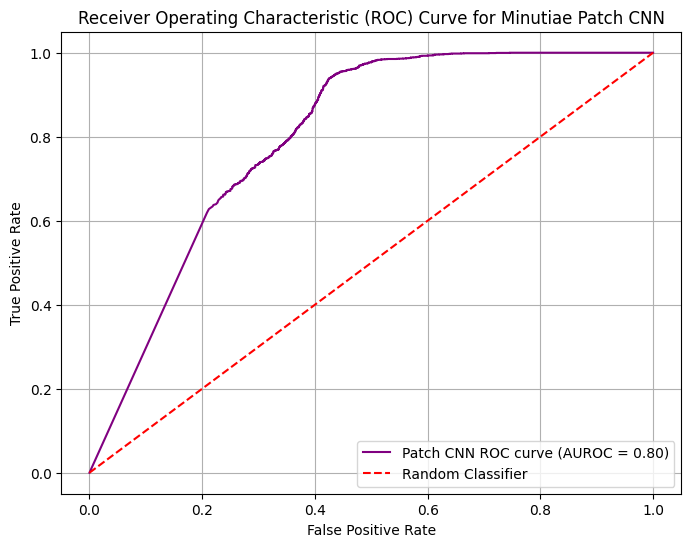

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test set to get loss and accuracy
loss, accuracy = patch_classifier_model.evaluate(X_test_patches, y_test_patches, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities on the test set for AUROC and EER
y_pred_proba_patch_cnn = patch_classifier_model.predict(X_test_patches).ravel()

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_patch_cnn = (y_pred_proba_patch_cnn > 0.5).astype(int)

# Calculate standard classification metrics
precision_patch_cnn = precision_score(y_test_patches, y_pred_patch_cnn)
recall_patch_cnn = recall_score(y_test_patches, y_pred_patch_cnn)
f1_patch_cnn = f1_score(y_test_patches, y_pred_patch_cnn)
roc_auc_patch_cnn = roc_auc_score(y_test_patches, y_pred_proba_patch_cnn)

# Re-using the calculate_eer function from earlier
def calculate_eer(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.abs(fpr - fnr))]
    eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
    return eer, eer_threshold

# Calculate EER for the patch CNN
eer_patch_cnn, eer_threshold_patch_cnn = calculate_eer(y_test_patches, y_pred_proba_patch_cnn)

print("\nMinutiae Patch CNN Model Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_patch_cnn:.4f}")
print(f"Recall: {recall_patch_cnn:.4f}")
print(f"F1-Score: {f1_patch_cnn:.4f}")
print(f"AUROC: {roc_auc_patch_cnn:.4f}")
print(f"EER: {eer_patch_cnn:.4f} (Threshold: {eer_threshold_patch_cnn:.4f})")

# Plot ROC curve for Patch CNN
fpr_patch_cnn, tpr_patch_cnn, _ = roc_curve(y_test_patches, y_pred_proba_patch_cnn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_patch_cnn, tpr_patch_cnn, color='purple', label=f'Patch CNN ROC curve (AUROC = {roc_auc_patch_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Minutiae Patch CNN')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.morphology import thin

# Redefine extract_minutiae to ensure it returns the grayscale enhanced image AND minutiae with their coordinates
def extract_minutiae(image_path):
    try:
        img = imread(image_path)

        # Handle 4-channel (RGBA) images by converting to RGB
        if img.ndim == 3 and img.shape[2] == 4:
            img = rgba2rgb(img)

        # Convert to grayscale if it's a color image
        if img.ndim == 3:
            img_gray = rgb2gray(img)
        else:
            img_gray = img # Already grayscale

        # Image Enhancement (Adaptive Histogram Equalization)
        img_enhanced = exposure.equalize_adapthist(img_gray)

        # Binarization
        thresh = threshold_otsu(img_enhanced)
        binary_img = img_enhanced > thresh

        # Thinning
        skeleton = thin(binary_img)

        # Minutiae Detection (ridge endings and bifurcations)
        minutiae = [] # Store (r, c, type) for each minutia
        for r in range(1, skeleton.shape[0] - 1):
            for c in range(1, skeleton.shape[1] - 1):
                if skeleton[r, c]: # If it's a ridge pixel
                    # Count neighbors
                    neighbors = np.sum(skeleton[r-1:r+2, c-1:c+2]) - 1 # Subtract central pixel

                    if neighbors == 1: # Ridge ending
                        minutiae.append((r, c, 'ending'))
                    elif neighbors == 3: # Bifurcation
                        minutiae.append((r, c, 'bifurcation'))

        return minutiae, img_enhanced # Return the grayscale enhanced image and minutiae with coordinates
    except Exception as e:
        # print(f"Error processing {image_path}: {e}") # Commented out to avoid excessive output
        return [], None


# extract_safe_patch remains the same, but it will consistently receive 2D images now
def extract_safe_patch(image, center_r, center_c, patch_size, half_patch):
    h, w = image.shape[:2]

    # Calculate patch boundaries
    r_start = center_r - half_patch
    r_end = center_r + half_patch + 1
    c_start = center_c - half_patch
    c_end = center_c + half_patch + 1

    # Determine fill value based on image data type
    if image.dtype.kind == 'f': # If image is float (0-1 range)
        fill_value = 1.0
    else: # If image is integer (0-255 range)
        fill_value = 255

    # Initialize an empty grayscale patch
    patch = np.full((patch_size, patch_size), fill_value, dtype=image.dtype)

    # Determine the region of the original image to copy
    img_r_start = max(0, r_start)
    img_r_end = min(h, r_end)
    img_c_start = max(0, c_start)
    img_c_end = min(w, c_end)

    # Determine the region of the patch to paste into
    patch_r_start = img_r_start - r_start
    patch_r_end = img_r_end - r_start
    patch_c_start = img_c_start - c_start
    patch_c_end = img_c_end - c_start

    # Copy the image data to the patch
    patch[patch_r_start:patch_r_end, patch_c_start:patch_c_end] = image[img_r_start:img_r_end, img_c_start:img_c_end]

    return patch


# Re-extract patches using the corrected functions, storing minutiae coordinates
minutiae_patches_with_coords = []

# Re-using the sample_df from previous steps for efficiency
print(f"Re-extracting {patch_size}x{patch_size} patches with coordinates for {len(sample_df)} sample images...")

for index, row in sample_df.iterrows():
    image_path = row['image_path']
    label = row['label']

    minutiae, original_enhanced_image = extract_minutiae(image_path)

    if original_enhanced_image is not None and minutiae:
        for r_coord, c_coord, minutia_type in minutiae:
            patch = extract_safe_patch(original_enhanced_image, r_coord, c_coord, patch_size, half_patch)
            minutiae_patches_with_coords.append({
                'patch': patch,
                'label': label,
                'minutia_type': minutia_type,
                'image_path': image_path,
                'minutia_r': r_coord, # Store row coordinate
                'minutia_c': c_coord  # Store column coordinate
            })

print(f"Total {len(minutiae_patches_with_coords)} minutiae patches with coordinates re-extracted.")

# Prepare data for model prediction and heatmap generation
X_patches_heatmap_raw = []
y_labels_heatmap_raw = []
image_paths_for_heatmap = []
minutia_coords_for_heatmap = [] # To store (r, c)

for item in minutiae_patches_with_coords:
    X_patches_heatmap_raw.append(item['patch'])
    y_labels_heatmap_raw.append(item['label'])
    image_paths_for_heatmap.append(item['image_path'])
    minutia_coords_for_heatmap.append((item['minutia_r'], item['minutia_c']))

# Convert to NumPy array and normalize, add channel dimension
X_patches_heatmap = np.array(X_patches_heatmap_raw)
if X_patches_heatmap.max() > 1.0:
    X_patches_heatmap = X_patches_heatmap / 255.0
X_patches_heatmap = np.expand_dims(X_patches_heatmap, axis=-1) # Add channel dimension

# Encode labels
label_mapping_patches = {'Altered': 0, 'Real': 1}
y_labels_heatmap = np.array([label_mapping_patches[label] for label in y_labels_heatmap_raw])

print(f"Prepared {len(X_patches_heatmap)} patches for heatmap generation with shapes: {X_patches_heatmap.shape}")

Re-extracting 65x65 patches with coordinates for 50 sample images...
Total 24622 minutiae patches with coordinates re-extracted.
Prepared 24622 patches for heatmap generation with shapes: (24622, 65, 65, 1)


## Generate Heatmaps from Patch Predictions

### Subtask:
Predict scores for all extracted minutiae patches using the trained `patch_classifier_model`. Then, for a selection of sample images, aggregate these patch-level scores into heatmaps, overlaying them onto the original fingerprint images to visualize regions of high 'Altered' or 'Real' probability. This will involve using the stored minutiae coordinates to map the patch scores back to the original image locations.

**Reasoning**:
The previous step successfully re-extracted minutiae patches along with their `(r, c)` coordinates, and prepared them in `X_patches_heatmap` and `minutia_coords_for_heatmap`. Now, I will predict the 'Real' probabilities for all these patches using `patch_classifier_model.predict()`. Then, I'll define a function `generate_and_visualize_heatmap` to create heatmaps on the original images. This function will initialize an empty heatmap, place patch scores at their corresponding minutia coordinates, average overlapping scores, and smooth the heatmap for better visualization. Finally, I will select a few sample images (one 'Altered' and one 'Real') and use this function to display their heatmaps.

770/770 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step
Generated 24622 prediction scores for patches.


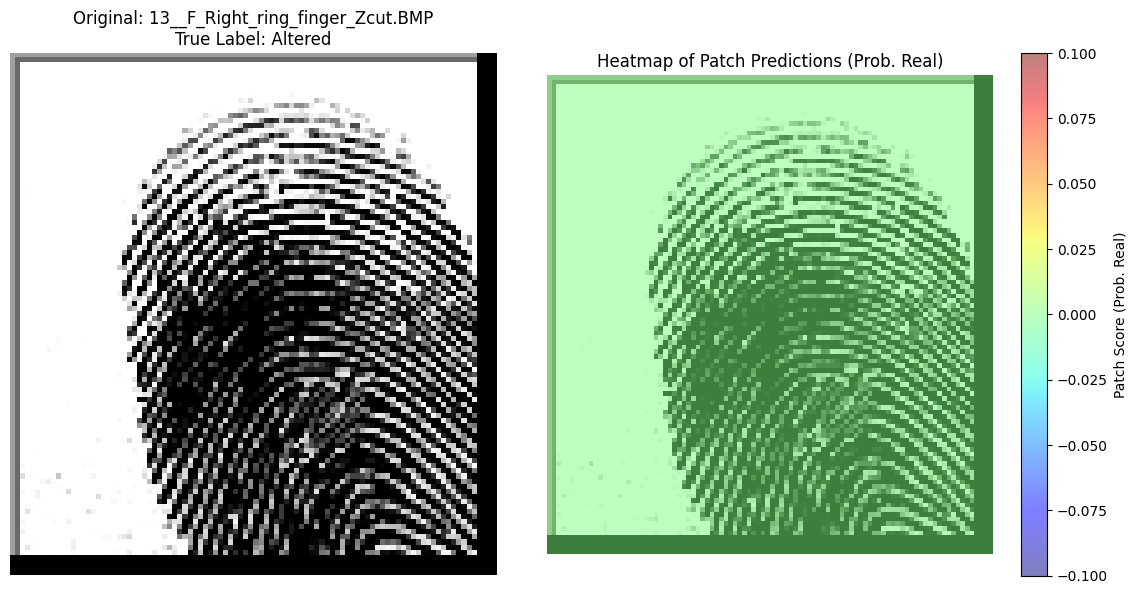

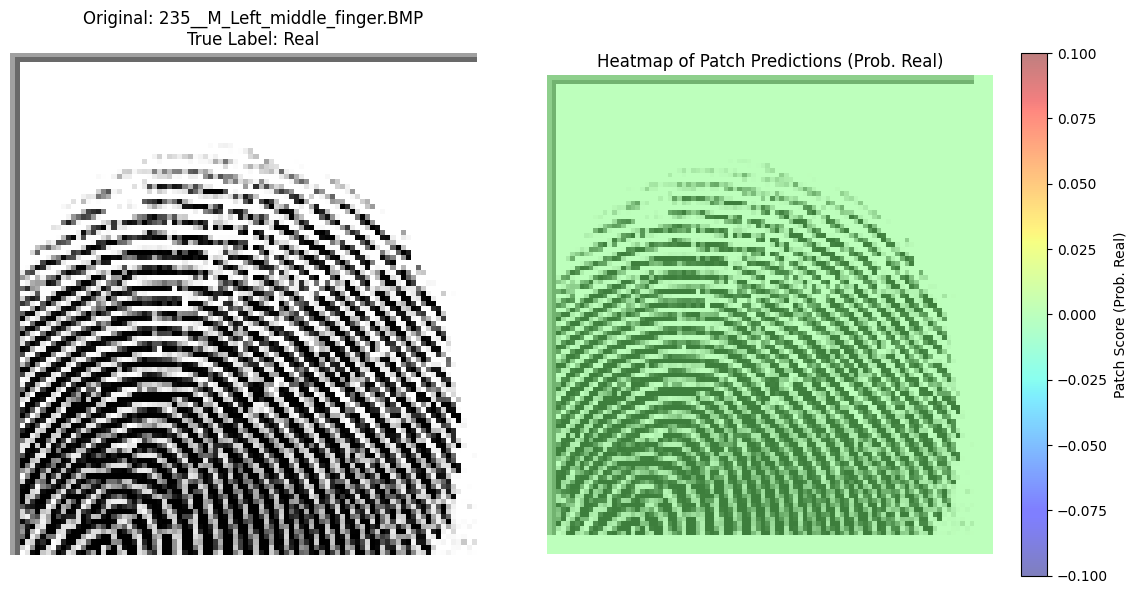

Heatmap generation and visualization for sample images complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.filters import gaussian
import pandas as pd # Ensure pandas is imported for DataFrame operations
import os # Ensure os is imported for os.path.basename

# 1. Predict probabilities for all patches using the trained model
# We want the probability of the positive class ('Real' is 1)
predicted_heatmap_scores = patch_classifier_model.predict(X_patches_heatmap).ravel()

print(f"Generated {len(predicted_heatmap_scores)} prediction scores for patches.")

# Create a DataFrame to easily associate scores, coords, and image paths
heatmap_data_df = pd.DataFrame({
    'image_path': image_paths_for_heatmap,
    'minutia_r': [coord[0] for coord in minutia_coords_for_heatmap],
    'minutia_c': [coord[1] for coord in minutia_coords_for_heatmap],
    'predicted_score': predicted_heatmap_scores
})

def generate_and_visualize_heatmap(image_path, minutia_df, model_prediction_for_image=None, original_label=None):
    try:
        # Load the original image
        img = imread(image_path)
        if img.ndim == 3 and img.shape[2] == 4:
            img = rgba2rgb(img)
        if img.ndim == 3:
            img_gray = rgb2gray(img)
        else:
            img_gray = img # Already grayscale

        h, w = img_gray.shape

        # Initialize heatmap and count maps
        heatmap = np.zeros((h, w), dtype=np.float32)
        count_map = np.zeros((h, w), dtype=np.int32)

        # Populate heatmap with scores
        for _, row in minutia_df.iterrows():
            r, c, score = int(row['minutia_r']), int(row['minutia_c']), row['predicted_score']
            # Ensure coordinates are within image bounds
            if 0 <= r < h and 0 <= c < w:
                heatmap[r, c] += score
                count_map[r, c] += 1

        # Average scores where multiple minutiae overlap or are very close
        # Avoid division by zero
        averaged_heatmap = np.divide(heatmap, count_map, out=np.zeros_like(heatmap), where=count_map!=0)

        # Smooth the heatmap for better visualization
        # Gaussian blur with a small sigma to spread out the scores
        smoothed_heatmap = gaussian(averaged_heatmap, sigma=5)

        plt.figure(figsize=(12, 6))

        # Plot original image
        plt.subplot(1, 2, 1)
        plt.imshow(img_gray, cmap='gray')
        title = f"Original: {os.path.basename(image_path)}"
        if original_label:
            title += f"\nTrue Label: {original_label}"
        if model_prediction_for_image is not None:
            title += f"\nImage-level Prediction: {'Real' if model_prediction_for_image > 0.5 else 'Altered'} (Score: {model_prediction_for_image:.2f})"

        plt.title(title)
        plt.axis('off')

        # Plot heatmap overlay
        plt.subplot(1, 2, 2)
        plt.imshow(img_gray, cmap='gray') # Display original image underneath
        # Overlay heatmap using a color map. 'jet' or 'viridis' are common for heatmaps.
        # Alpha for transparency
        cbar = plt.imshow(smoothed_heatmap, cmap='jet', alpha=0.5)
        plt.colorbar(cbar, ax=plt.gca(), orientation='vertical', label='Patch Score (Prob. Real)')
        plt.title(f"Heatmap of Patch Predictions (Prob. Real)")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating heatmap for {image_path}: {e}")

# Select a sample 'Altered' image for heatmap visualization
altered_image_for_heatmap_path = all_images_df[all_images_df['label'] == 'Altered'].sample(1, random_state=42)['image_path'].iloc[0]
minutiae_for_altered_heatmap = heatmap_data_df[heatmap_data_df['image_path'] == altered_image_for_heatmap_path]

# For image-level prediction, we can average the patch scores or use the previous CNN model's prediction
# Let's use the average of the patch scores for now, or you can retrieve the simple_cnn_model's prediction.
altered_image_avg_patch_score = minutiae_for_altered_heatmap['predicted_score'].mean() if not minutiae_for_altered_heatmap.empty else None

generate_and_visualize_heatmap(
    altered_image_for_heatmap_path,
    minutiae_for_altered_heatmap,
    model_prediction_for_image=altered_image_avg_patch_score,
    original_label='Altered'
)

# Select a sample 'Real' image for heatmap visualization
real_image_for_heatmap_path = all_images_df[all_images_df['label'] == 'Real'].sample(1, random_state=42)['image_path'].iloc[0]
minutiae_for_real_heatmap = heatmap_data_df[heatmap_data_df['image_path'] == real_image_for_heatmap_path]
real_image_avg_patch_score = minutiae_for_real_heatmap['predicted_score'].mean() if not minutiae_for_real_heatmap.empty else None

generate_and_visualize_heatmap(
    real_image_for_heatmap_path,
    minutiae_for_real_heatmap,
    model_prediction_for_image=real_image_avg_patch_score,
    original_label='Real'
)

print("Heatmap generation and visualization for sample images complete.")